In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install statsmodels==0.13.0
!pip install pmdarima

     |████████████████████████████████| 9.8 MB 30.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 33.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import missingno

import scipy as sp

# TIME SERIES
from statsmodels.tsa.arima.model import ARIMA # v 0.13.0
#from statsmodels.tsa.arima_model import ARIMA #v 0.12.1
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf,arma_order_select_ic
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
import glob

#get all csv file names
filepath='Datafor555/NY'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
li = []
for filename in all_files:
    yr=filename[-6:-4]
    df_ny = pd.read_csv(filename)
    df_ny['year']=yr
    li.append(df_ny)

#concatenate all csv files into a dataframe
df_NY = pd.concat(li, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_NY_grouped_yearly=df_NY.groupby(['year']).mean()

df_NY_grouped_yearly

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,96,102,106,109,113,114,121,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,96,102,106,109,113,114,119,120,121,123,124,128,129,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,96,98,102,106,107,108,109,113,114,119,120,121,123,124,128,129,130,131,133) have mixed types.Specify dtype option on import or

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,COUNTY_CODE_003,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPERATING_RATING_064,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,36,4.374212,0.947497,0.0,58.701839,42526.461779,76.683513,0.000604,0.303290,0.0,4.206764e+07,7.527591e+07,12.587929,2.955799,3.804049,3.833151,10.156198,1958.107659,2.359239,1.754342,14597.968030,1994.520659,10.501547,0.224139,16.775535,0.068024,4.964004,0.328709,1.156500,2.097772,3.403270,3.131165,4.590471,0.061824,0.079883,2.212409,0.196653,11.504222,21.987347,64.002758,0.494933,0.500972,9.830361,11.957530,95.623847,1.262011,75.309190,1.286229,63.285944,34.617524,4.812665,33.590912,1.000345,47.935311,794.651599,22.675638,904.076145,856.478149,0.000000,1237.248017,744.051960,2328.431371,1999.997412,24.043478,0.293588,1.807264,0.224436,0.002588,455.035478,7.547675,0.170607,2.069705,11157.930393,2017.745687,0.270000,74.467874,NaN,NaN,NaN,NaN
01,36,4.376032,0.950640,0.0,58.707790,42561.049411,76.677150,0.593348,0.000000,NaN,4.207074e+07,7.528237e+07,15.576828,2.956114,3.641153,3.673170,10.155708,1958.747475,2.360766,1.760483,14943.178636,1995.094331,10.555857,0.224082,16.806491,0.068289,4.964504,0.329055,1.152580,2.096150,3.402582,3.143090,4.574716,0.061799,0.079982,2.207341,0.196698,11.506144,22.110829,64.150716,0.493751,0.499580,9.867846,12.013612,95.635827,1.264194,75.254439,1.298550,63.703890,34.954255,4.819532,33.610042,1.000394,45.702641,733.727487,22.755912,800.000000,842.469388,0.000000,1105.607323,647.444631,1734.698806,1999.994874,21.093023,0.293976,1.806522,0.164402,0.002590,449.094350,7.597524,0.172151,2.050667,11483.216815,2015.603525,0.457143,76.911052,NaN,NaN,NaN,NaN
02,36,4.366084,0.947416,0.0,58.686516,42539.349113,76.902734,102.866821,0.000000,NaN,4.208131e+07,7.544922e+07,12.330286,2.956559,3.805969,3.840646,10.118715,1959.303900,2.364700,1.752029,14936.372214,1995.585025,10.588886,0.223768,16.803393,0.068706,4.905537,0.325536,1.091216,2.096449,3.408471,3.149932,4.588617,0.061932,0.079816,2.203588,0.197321,11.559868,22.157729,64.180783,0.491754,0.497159,9.902225,12.051124,95.755620,1.273135,75.199741,1.296096,64.048160,35.232524,4.832413,33.841073,1.000406,45.968550,692.850029,22.847096,800.000000,826.644918,NaN,1049.602130,619.598276,1669.307201,2000.992593,21.093023,0.150637,1.806557,0.164739,0.002588,451.816133,7.595304,0.178653,2.061497,11417.665688,2016.128130,0.504545,77.661393,NaN,NaN,NaN,NaN
03,36,4.358820,0.945648,0.0,58.701765,42546.511770,76.922380,103.071372,0.000000,NaN,4.208522e+07,7.557879e+07,12.287059,2.956683,3.835233,3.872007,10.113965,1959.690619,2.365570,1.751313,14992.421471,1995.702207,10.594662,0.220580,16.815740

In [ ]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_NY['year']=df_NY['year'].map(d)
df_NY

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,36,000000001000040,1,2.0,1.0,1,0.0,87,119.0,44831.0,MAMARONECK RIVER,NaN,BOSTON POST RD,JCT RTE 1+MAMARONECK R,99.99,NaN,NaN,NaN,NaN,40565400.0,73440000.0,6.0,3.0,1.0,1.0,14.0,1895.0,5.0,0.0,17085.0,1990.0,4,16.2,0.0,35.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,N,6,0,N,6.0,0.0,NaN,Y,6,20819.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,50.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,000000001000090,1,2.0,1.0,1,0.0,87,119.0,64309.0,RTE I 287,NaN,RTE 1,JCT RTS 1+I287,99.99,NaN,NaN,NaN,NaN,40593000.0,73404200.0,0.0,3.0,1.0,1.0,14.0,1959.0,4.0,6.0,22577.0,1990.0,6,14.6,0.0,37.0,0.0,1,1,1,0,...,NaN,NaN,NaN,1971.0,1,1,0,0,6.0,0.0,NaN,Y,N,36632.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,45.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,000000001000121,1,2.0,1.0,1,0.0,87,119.0,59223.0,BYRAM RIVER,NaN,RTE 1,JCT RTE 1+N Y+CONN ST LN,99.99,NaN,NaN,NaN,NaN,41004200.0,73392400.0,2.0,3.0,1.0,1.0,14.0,1926.0,2.0,0.0,4594.0,1990.0,4,13.7,0.0,0.0,0.0,0,N,0,0,...,NaN,NaN,NaN,0.0,1,6,0,0,6.0,0.0,NaN,Y,6,12845.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,58.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,000000001000122,1,2.0,1.0,1,0.0,87,119.0,59223.0,BYRAM RIVER,NaN,RTE 1,JCT RTE 1+N Y+CONN ST LN,99.99,NaN,NaN,NaN,NaN,41004200.0,73392400.0,2.0,3.0,1.0,1.0,14.0,1888.0,2.0,0.0,4594.0,1990.0,NaN,9.1,0.0,0.0,0.0,0,N,0,0,...,NaN,NaN,NaN,0.0,N,6,0,N,6.0,0.0,NaN,Y,6,12845.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,54.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36,000000001000140,1,3.0,1.0,32,0.0,11,1.0,46536.0,D&HRR,NaN,RTE 32,0.9 MI S JCT 32 & 378,99.99,NaN,NaN,NaN,NaN,42411800.0,73434200.0,5.0,3.0,1.0,1.0,16.0,1938.0,4.0,0.0,10130.0,1990.0,NaN,19.2,0.0,67.0,0.0,0,0,1,0,...,NaN,NaN,NaN,0.0,1,6,0,0,5.0,0.0,NaN,Y,N,12074.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,57.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,36,DAPUSMWPT000025,1,8.0,0.0,0,0.0,0,71.0,80753.0,POPOLOPEN BROOK,NaN,GRAVEL ROAD,QUEENSBORO FURNACE,99.99,0.0,0.0,NaN,NaN,41191313.0,74011148.0,1.0,3.0,74.0,74.0,9.0,1908.0,1.0,0.0,10.0,2011.0,0,5.1,0.0,0.0,0.0,0,0,0,0,...,NaN,0.0,0.0,0.0,N,8,N,N,0.0,0.0,NaN,Y,U,20.0,2031.0,NaN,Y,,,,,,,,,,,,1,,37.5,1,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17438,36,DAPUSMWPT000027,1,8.0,0.0,0,0.0,0,71.0,80753.0,CROWS NEST BROOK,NaN,UPTON ROAD CSX RR,TARGET HILL ATHLETIC FIEL,99.99,0.0,0.0,NaN,NaN,41241224.0,73575897.0,

In [ ]:
weatherdata = pd.read_csv("Datafor555/avg_temp.NY.csv", index_col=False)
NYweather = weatherdata.loc[:,['year','avg_temp','avg_prcp','max_temp','min_temp']]
NYweather

,year,avg_temp,avg_prcp,max_temp,min_temp
0,1992,43.8,42.69,59.9,34.1
1,1993,44.2,41.37,59.6,34.0
2,1994,44.3,42.11,61.5,34.0
3,1995,45.2,37.10,60.4,35.1
4,1996,44.5,50.83,59.0,35.0
5,1997,44.3,39.01,60.7,34.4
6,1998,48.3,41.40,62.2,38.7
7,1999,46.9,38.77,60.1,36.4
8,2000,44.9,46.24,59.1,35.2
9,2001,46.9,34.14,60.1,36.8


In [ ]:
df1_NY=df_NY.merge(NYweather, left_index=False)
df1_NY

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avg_temp,avg_prcp,max_temp,min_temp
0,36,000000001000040,1,2.0,1.0,1,0.0,87,119.0,44831.0,MAMARONECK RIVER,NaN,BOSTON POST RD,JCT RTE 1+MAMARONECK R,99.99,NaN,NaN,NaN,NaN,40565400.0,73440000.0,6.0,3.0,1.0,1.0,14.0,1895.0,5.0,0.0,17085.0,1990.0,4,16.2,0.0,35.0,0.0,0,0,0,0,...,N,6,0,N,6.0,0.0,NaN,Y,6,20819.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,50.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.8,42.69,59.9,34.1
1,36,000000001000090,1,2.0,1.0,1,0.0,87,119.0,64309.0,RTE I 287,NaN,RTE 1,JCT RTS 1+I287,99.99,NaN,NaN,NaN,NaN,40593000.0,73404200.0,0.0,3.0,1.0,1.0,14.0,1959.0,4.0,6.0,22577.0,1990.0,6,14.6,0.0,37.0,0.0,1,1,1,0,...,1,1,0,0,6.0,0.0,NaN,Y,N,36632.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,45.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.8,42.69,59.9,34.1
2,36,000000001000121,1,2.0,1.0,1,0.0,87,119.0,59223.0,BYRAM RIVER,NaN,RTE 1,JCT RTE 1+N Y+CONN ST LN,99.99,NaN,NaN,NaN,NaN,41004200.0,73392400.0,2.0,3.0,1.0,1.0,14.0,1926.0,2.0,0.0,4594.0,1990.0,4,13.7,0.0,0.0,0.0,0,N,0,0,...,1,6,0,0,6.0,0.0,NaN,Y,6,12845.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,58.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.8,42.69,59.9,34.1
3,36,000000001000122,1,2.0,1.0,1,0.0,87,119.0,59223.0,BYRAM RIVER,NaN,RTE 1,JCT RTE 1+N Y+CONN ST LN,99.99,NaN,NaN,NaN,NaN,41004200.0,73392400.0,2.0,3.0,1.0,1.0,14.0,1888.0,2.0,0.0,4594.0,1990.0,NaN,9.1,0.0,0.0,0.0,0,N,0,0,...,N,6,0,N,6.0,0.0,NaN,Y,6,12845.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,54.2,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.8,42.69,59.9,34.1
4,36,000000001000140,1,3.0,1.0,32,0.0,11,1.0,46536.0,D&HRR,NaN,RTE 32,0.9 MI S JCT 32 & 378,99.99,NaN,NaN,NaN,NaN,42411800.0,73434200.0,5.0,3.0,1.0,1.0,16.0,1938.0,4.0,0.0,10130.0,1990.0,NaN,19.2,0.0,67.0,0.0,0,0,1,0,...,1,6,0,0,5.0,0.0,NaN,Y,N,12074.0,2010.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,57.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.8,42.69,59.9,34.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592433,36,DAPUSMWPT000025,1,8.0,0.0,0,0.0,0,71.0,80753.0,POPOLOPEN BROOK,NaN,GRAVEL ROAD,QUEENSBORO FURNACE,99.99,0.0,0.0,NaN,NaN,41191313.0,74011148.0,1.0,3.0,74.0,74.0,9.0,1908.0,1.0,0.0,10.0,2011.0,0,5.1,0.0,0.0,0.0,0,0,0,0,...,N,8,N,N,0.0,0.0,NaN,Y,U,20.0,2031.0,NaN,Y,,,,,,,,,,,,1,,37.5,1,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.7,43.99,61.6,36.1
592434,36,DAPUSMWPT000027,1,8.0,0.0,0,0.0,0,71.0,80753.0,CROWS NEST BROOK,NaN,UPTON ROAD CSX RR,TARGET HILL ATHLETIC FIEL,99.99,0.0,0.0,NaN,NaN,41241224.0,73575897.0,199.0,3.0,74.0

In [ ]:
df1_NY['Age_of_Bridge'] = df1_NY['year']-df1_NY['YEAR_BUILT_027']
df2_NY=df1_NY.loc[:,['Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','avg_temp','avg_prcp','min_temp','max_temp','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df2_NY.dropna(inplace=True)
df3_NY=df2_NY[(df2_NY['SUBSTRUCTURE_COND_060']!='N') & (df2_NY['SUPERSTRUCTURE_COND_059']!='N') & (df2_NY['DECK_COND_058']!='N')]
for col in df3_NY:
  df3_NY[col]=df3_NY[col].astype(float)
df3_NY

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,avg_temp,avg_prcp,min_temp,max_temp,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
1,33.0,4.0,22577.0,23.2,4.0,14.6,14.6,43.8,42.69,34.1,59.9,6.0,6.0,4.0
2,66.0,2.0,4594.0,10.1,2.0,13.7,13.7,43.8,42.69,34.1,59.9,5.0,4.0,4.0
4,54.0,4.0,10130.0,25.6,2.0,19.1,19.2,43.8,42.69,34.1,59.9,4.0,4.0,4.0
5,60.0,4.0,29269.0,12.2,1.0,29.9,13.7,43.8,42.69,34.1,59.9,4.0,4.0,4.0
6,61.0,2.0,3492.0,29.0,1.0,9.2,6.1,43.8,42.69,34.1,59.9,5.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592430,63.0,2.0,200.0,10.1,1.0,5.5,5.5,45.7,43.99,36.1,61.6,7.0,5.0,7.0
592431,42.0,1.0,5.0,13.4,1.0,8.5,8.5,45.7,43.99,36.1,61.6,6.0,6.0,6.0
592432,18.0,1.0,100.0,3.3,3.0,2.7,2.7,45.7,43.99,36.1,61.6,6.0,7.0,6.0
592435,43.0,1.0,20.0,5.6,1.0,3.6,3.6,45.7,43.99,36.1,61.6,7.0,6.0,7.0


In [ ]:
# Separate the Feature data X from the response data y1,y2,y3
X=df3_NY.iloc[:,:-3] # All columns except for the last 3 columns
y1=df3_NY.iloc[:,-3] #The last column would be our response variable in our case, Deck Condition
y2=df3_NY.iloc[:,-2]  #The last column would be our response variable in our case, SuperStructure Condition
y3=df3_NY.iloc[:,-1]  #The last column would be our response variable in our case, Substructure Condition

For the Deck

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model.best_estimator_

KNeighborsClassifier()

In [ ]:
pred=model.predict(X_test)
pred

array([8., 9., 6., ..., 5., 6., 7.])

In [ ]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.17      0.33      0.22         3
         1.0       0.14      0.17      0.15        18
         2.0       0.31      0.26      0.28        62
         3.0       0.34      0.35      0.35      1205
         4.0       0.46      0.56      0.51      9701
         5.0       0.48      0.54      0.51     16032
         6.0       0.51      0.52      0.51     17817
         7.0       0.52      0.48      0.50     15931
         8.0       0.55      0.47      0.51     13834
         9.0       0.62      0.49      0.54      7314

    accuracy                           0.51     81917
   macro avg       0.41      0.42      0.41     81917
weighted avg       0.51      0.51      0.51     81917

[[   1    1    0    0    0    0    0    1    0    0]
 [   0    3    1    1    2    4    1    5    0    1]
 [   0    0   16   12    7    6    4   11    4    2]
 [   0    2    5  421  318  188  139   66   45   21]
 [   0    2    5  241 5424 19

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

0.5075503253292968

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the deck is {metrics.accuracy_score(y_test, pred)*100 :.2f}%')

the accuracy score value for the deck is 50.76%


In [ ]:
This takes into consideration the bridge age

In [ ]:
KA = []
ivector= []
for i in range(0,150,10): # Age of Bridge
      pred_i = model.predict(np.array([i,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA.append(pred_i)
      ivector.append(i)
      print(i,pred_i)

0 8.0
10 8.0
20 8.0
30 8.0
40 7.0
50 6.0
60 6.0
70 5.0
80 5.0
90 5.0
100 5.0
110 8.0
120 8.0
130 7.0
140 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

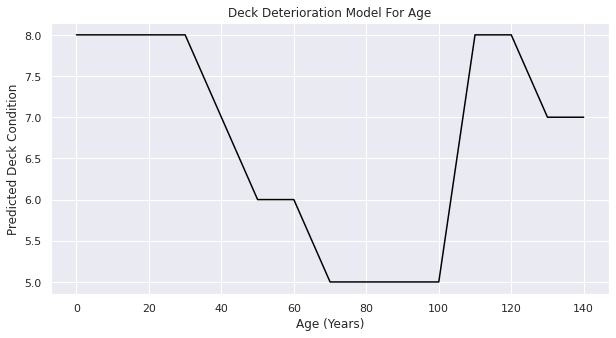

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(ivector, KA, color ='black')
plt.xlabel("Age (Years)")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Age")
plt.show()

In [ ]:
This takes into consideration the Average Daily Traffic 

In [ ]:
KA1 = []
jvector = []
for j in range(0,500000,5000): # Average Daily Traffic
      pred_j = model.predict(np.array([50,4,j,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA1.append(pred_j)
      jvector.append(j)
      print(j,pred_j)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

0 5.0
5000 5.0
10000 5.0
15000 5.0
20000 7.0
25000 6.0
30000 6.0
35000 7.0
40000 4.0
45000 6.0
50000 8.0
55000 6.0
60000 6.0
65000 7.0
70000 7.0
75000 6.0
80000 6.0
85000 5.0
90000 6.0
95000 5.0
100000 8.0
105000 4.0
110000 9.0
115000 4.0
120000 4.0
125000 4.0
130000 5.0
135000 4.0
140000 4.0
145000 6.0
150000 5.0
155000 5.0
160000 6.0
165000 4.0
170000 6.0
175000 5.0
180000 5.0
185000 6.0
190000 7.0
195000 6.0
200000 6.0
205000 3.0
210000 6.0
215000 6.0
220000 8.0
225000 8.0
230000 8.0
235000 8.0
240000 8.0
245000 8.0
250000 5.0
255000 5.0
260000 5.0
265000 5.0
270000 5.0
275000 7.0
280000 5.0
285000 5.0
290000 6.0
295000 6.0
300000 6.0
305000 6.0
310000 6.0
315000 6.0
320000 6.0
325000 6.0
330000 6.0
335000 6.0
340000 6.0
345000 6.0
350000 6.0
355000 6.0
360000 6.0
365000 6.0
370000 6.0
375000 6.0
380000 6.0
385000 6.0
390000 6.0
395000 6.0
400000 6.0
405000 6.0
410000 6.0
415000 6.0
420000 6.0
425000 6.0
430000 6.0
435000 6.0
440000 6.0
445000 6.0
450000 8.0
455000 8.0
460000 8.0
46

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

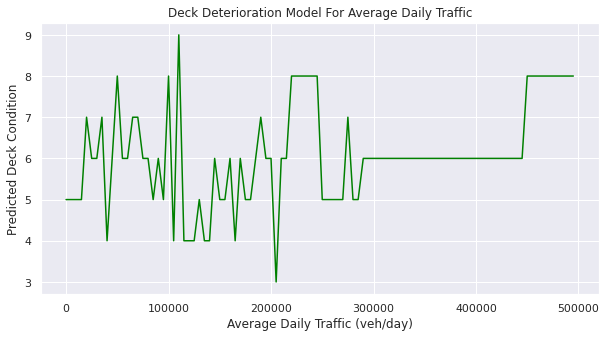

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(jvector, KA1, color ='green')
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Average Daily Traffic")
plt.show()

For Precipitation

In [ ]:
KA2 = []
kvector=[]
for k in range(0,55,5): # Average Precipitation
      pred_k = model.predict(np.array([50,2,30000,50,25,15,10,50,k,30,85]).reshape(1,-1))[0]
      KA2.append(pred_k)
      kvector.append(k)
      print(k,pred_k)

0 6.0
5 6.0
10 6.0
15 6.0
20 6.0
25 6.0
30 6.0
35 6.0
40 6.0
45 6.0
50 6.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

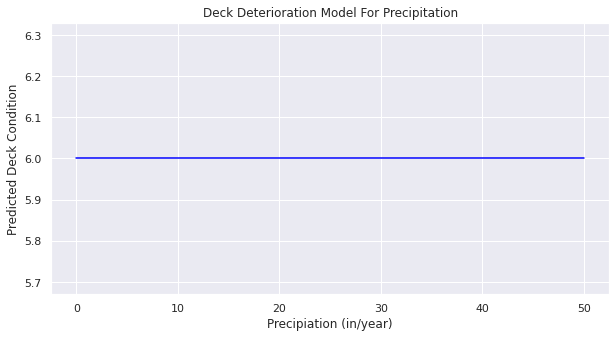

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(kvector, KA2, color ='blue')
plt.xlabel("Precipiation (in/year)")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Precipitation")
plt.show()

# For Average Temperature # 

In [ ]:
KA3 = []
lvector = []
for l in range(0,95,5): # Average Precipitation
      pred_l = model.predict(np.array([50,2,30000,50,25,15,10,l,40,30,85]).reshape(1,-1))[0]
      KA3.append(pred_l)
      lvector.append(l)
      print(l,pred_l)

0 6.0
5 6.0
10 6.0
15 6.0
20 6.0
25 6.0
30 6.0
35 6.0
40 6.0
45 6.0
50 6.0
55 6.0
60 6.0
65 6.0
70 6.0
75 6.0
80 6.0
85 6.0
90 6.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

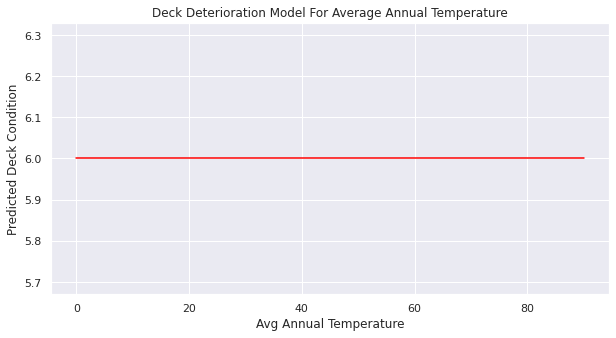

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(lvector, KA3, color ='red')
plt.xlabel("Avg Annual Temperature")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Average Annual Temperature")
plt.show()

In [ ]:
import pickle
filename1 = 'GBT_Deck_NY.sav'
pickle.dump(model, open(filename1,'wb'))

In [ ]:
loaded_model1 = pickle.load(open(filename1,'rb'))
result = loaded_model1.score(X_test,y_test)
print(result)

0.5075503253292968


In [ ]:
loaded_model1.predict(X_test)[0]

8.0

For the SuperStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model1 = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model1.fit(X1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model1.best_estimator_

KNeighborsClassifier()

In [ ]:
pred1=model1.predict(X1_test)
pred1

array([8., 9., 5., ..., 5., 6., 7.])

In [ ]:
print(classification_report(y1_test, pred1))
print(confusion_matrix(y1_test, pred1))

              precision    recall  f1-score   support

         0.0       0.33      0.31      0.32       190
         1.0       0.35      0.40      0.37        20
         2.0       0.24      0.37      0.29        52
         3.0       0.41      0.45      0.43      2655
         4.0       0.39      0.43      0.41      6125
         5.0       0.47      0.53      0.50     14080
         6.0       0.51      0.53      0.52     18009
         7.0       0.53      0.51      0.52     16365
         8.0       0.59      0.53      0.56     15430
         9.0       0.67      0.56      0.61      8991

    accuracy                           0.52     81917
   macro avg       0.45      0.46      0.45     81917
weighted avg       0.53      0.52      0.52     81917

[[  58    1    1   54   19   33   17    2    5    0]
 [   0    8    0    4    1    3    0    4    0    0]
 [   0    1   19    8    3    5   13    1    1    1]
 [  35    6   13 1186  374  494  307  139   75   26]
 [  16    2    9  408 2624 15

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y1_test, pred1)

0.5188422427579135

In [ ]:
# Print the accuracy score
print(f'The accuracy score value for the Superstructure is {metrics.accuracy_score(y1_test, pred1)*100 :.2f}%')

The accuracy score value for the Superstructure is 51.88%


In [ ]:
filename2 = 'GBT_Super_NY.sav'
pickle.dump(model1, open(filename2,'wb'))

In [ ]:
loaded_model2 = pickle.load(open(filename2,'rb'))
result = loaded_model2.score(X1_test,y1_test)
print(result)

0.5188422427579135


In [ ]:
This takes into consideration the bridge age_SuperStructure

In [ ]:
KA4 = []
hvector=[]
for h in range(0,150,10): # Age of Bridge
      pred_h = model1.predict(np.array([h,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA4.append(pred_h)
      hvector.append(h)
      print(h,pred_h)

0 6.0
10 5.0
20 5.0
30 5.0
40 7.0
50 6.0
60 6.0
70 6.0
80 5.0
90 5.0
100 5.0
110 9.0
120 9.0
130 9.0
140 9.0


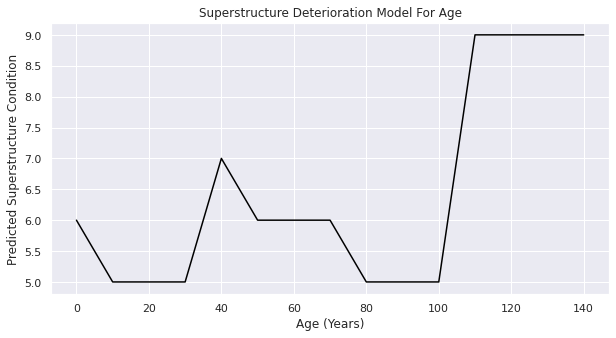

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(hvector, KA4, color ='black')
plt.xlabel("Age (Years)")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Age")
plt.show()

In [ ]:
This takes into consideration the Average Daily Traffic 

In [ ]:
KA5 = []
mvector=[]
for m in range(0,500000,5000): # Average Daily Traffic
      pred_m = model1.predict(np.array([50,4,m,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA5.append(pred_m)
      mvector.append(m)
      print(m,pred_m)

0 6.0
5000 6.0
10000 6.0
15000 3.0
20000 7.0
25000 5.0
30000 6.0
35000 7.0
40000 5.0
45000 4.0
50000 6.0
55000 9.0
60000 6.0
65000 9.0
70000 7.0
75000 6.0
80000 6.0
85000 4.0
90000 5.0
95000 4.0
100000 7.0
105000 5.0
110000 8.0
115000 4.0
120000 4.0
125000 4.0
130000 5.0
135000 5.0
140000 6.0
145000 6.0
150000 6.0
155000 5.0
160000 7.0
165000 4.0
170000 6.0
175000 6.0
180000 5.0
185000 7.0
190000 7.0
195000 5.0
200000 6.0
205000 6.0
210000 9.0
215000 7.0
220000 7.0
225000 7.0
230000 7.0
235000 7.0
240000 7.0
245000 7.0
250000 5.0
255000 5.0
260000 5.0
265000 5.0
270000 5.0
275000 6.0
280000 6.0
285000 6.0
290000 6.0
295000 6.0
300000 6.0
305000 6.0
310000 6.0
315000 6.0
320000 6.0
325000 6.0
330000 6.0
335000 6.0
340000 6.0
345000 6.0
350000 6.0
355000 6.0
360000 6.0
365000 6.0
370000 6.0
375000 6.0
380000 6.0
385000 6.0
390000 6.0
395000 6.0
400000 6.0
405000 6.0
410000 6.0
415000 6.0
420000 6.0
425000 6.0
430000 6.0
435000 6.0
440000 6.0
445000 6.0
450000 8.0
455000 8.0
460000 8.0
46

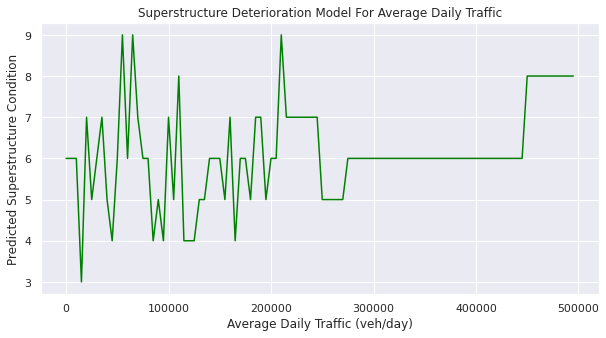

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(mvector, KA5, color ='green')
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Average Daily Traffic")
plt.show()

For Precipitation

In [ ]:
KA6 = []
nvector=[]
for n in range(0,50,5): # Average Precipitation
      pred_n = model1.predict(np.array([50,2,30000,50,25,15,10,50,n,30,85]).reshape(1,-1))[0]
      KA6.append(pred_n)
      nvector.append(n)
      print(n,pred_n)

0 5.0
5 5.0
10 5.0
15 5.0
20 7.0
25 7.0
30 7.0
35 6.0
40 6.0
45 6.0


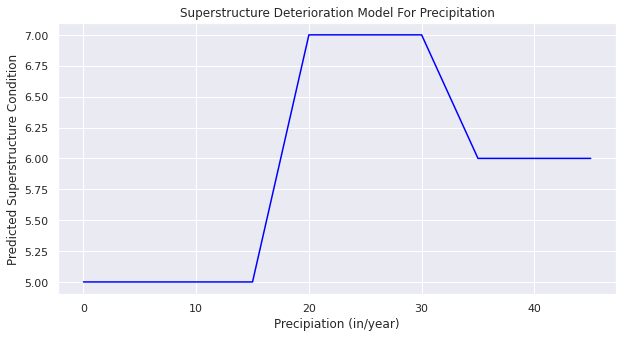

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(nvector, KA6, color ='blue')
plt.xlabel("Precipiation (in/year)")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Precipitation")
plt.show()

# For Average Temperature # 

In [ ]:
KA7 = []
tvector=[]
for t in range(0,95,5): # Average Temperature
      pred_t = model1.predict(np.array([50,2,30000,50,25,15,10,t,40,30,85]).reshape(1,-1))[0]
      KA7.append(pred_t)
      tvector.append(t)
      print(t,pred_t)

0 6.0
5 6.0
10 6.0
15 6.0
20 6.0
25 6.0
30 6.0
35 6.0
40 6.0
45 6.0
50 6.0
55 6.0
60 6.0
65 6.0
70 7.0
75 7.0
80 7.0
85 7.0
90 7.0


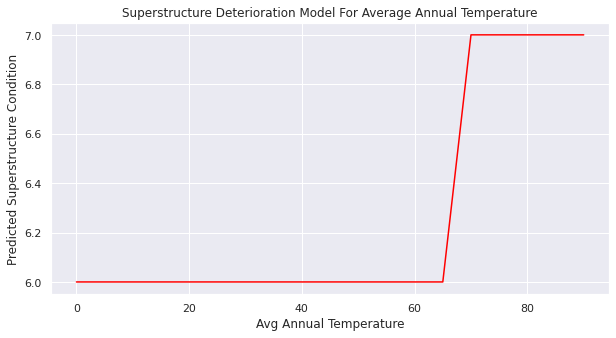

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(tvector, KA7, color ='red')
plt.xlabel("Avg Annual Temperature")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Average Annual Temperature")
plt.show()

For SubStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model2 = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model2.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model2.best_estimator_

KNeighborsClassifier()

In [ ]:
pred2=model2.predict(X2_test)
pred2

array([5., 9., 5., ..., 6., 6., 8.])

In [ ]:
print(classification_report(y2_test, pred2))
print(confusion_matrix(y2_test, pred2))

              precision    recall  f1-score   support

         0.0       0.29      0.22      0.25       180
         1.0       0.00      0.00      0.00        13
         2.0       0.17      0.15      0.16        92
         3.0       0.40      0.44      0.42      2996
         4.0       0.45      0.51      0.48      9523
         5.0       0.48      0.54      0.51     17349
         6.0       0.53      0.53      0.53     19207
         7.0       0.55      0.50      0.53     16493
         8.0       0.57      0.48      0.52     10695
         9.0       0.65      0.57      0.61      5369

    accuracy                           0.52     81917
   macro avg       0.41      0.39      0.40     81917
weighted avg       0.52      0.52      0.52     81917

[[   40     0     3    51    35    31    11     7     2     0]
 [    0     0     1     1     4     5     1     1     0     0]
 [    1     0    14    10    17    23    24     2     0     1]
 [   21     1    13  1305   670   531   297   117   

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y2_test, pred2)

0.5158147881392141

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the Sub-Structure is {metrics.accuracy_score(y2_test, pred2)*100 :.2f}%')

the accuracy score value for the Sub-Structure is 51.58%


In [ ]:
filename3 = 'GBT_Super_NY.sav'
pickle.dump(model2, open(filename3,'wb'))

In [ ]:
loaded_model3 = pickle.load(open(filename3,'rb'))
result = loaded_model3.score(X2_test,y2_test)
print(result)

0.5158147881392141


In [ ]:
This takes into consideration the bridge age_SuperStructure 

In [ ]:
KA8 = []
uvector = []
for u in range(0,150,10): # Age of Bridge
      pred_u = model2.predict(np.array([u,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA8.append(pred_u)
      uvector.append(u)
      print(u,pred_u)

0 6.0
10 8.0
20 8.0
30 8.0
40 7.0
50 6.0
60 4.0
70 4.0
80 4.0
90 4.0
100 4.0
110 6.0
120 6.0
130 6.0
140 6.0


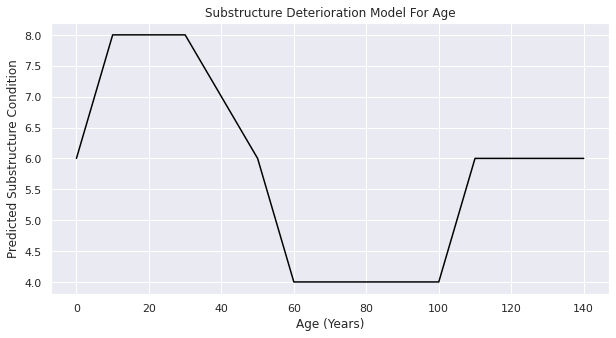

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(uvector, KA8, color ='black')
plt.xlabel("Age (Years)")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Age")
plt.show()

In [ ]:
This takes into consideration the Average Daily Traffic

In [ ]:
KA9 = []
yvector=[]
for y in range(0,500000,5000): # Average Daily Traffic
      pred_y = model2.predict(np.array([50,4,y,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA9.append(pred_y)
      yvector.append(y)
      print(y,pred_y)

0 4.0
5000 5.0
10000 6.0
15000 3.0
20000 6.0
25000 6.0
30000 6.0
35000 6.0
40000 5.0
45000 7.0
50000 6.0
55000 6.0
60000 6.0
65000 7.0
70000 7.0
75000 5.0
80000 6.0
85000 4.0
90000 7.0
95000 4.0
100000 8.0
105000 7.0
110000 8.0
115000 3.0
120000 5.0
125000 4.0
130000 5.0
135000 6.0
140000 4.0
145000 7.0
150000 5.0
155000 5.0
160000 7.0
165000 5.0
170000 4.0
175000 6.0
180000 6.0
185000 6.0
190000 5.0
195000 7.0
200000 7.0
205000 6.0
210000 7.0
215000 7.0
220000 7.0
225000 7.0
230000 7.0
235000 7.0
240000 7.0
245000 7.0
250000 5.0
255000 5.0
260000 5.0
265000 5.0
270000 5.0
275000 6.0
280000 5.0
285000 5.0
290000 6.0
295000 6.0
300000 5.0
305000 5.0
310000 5.0
315000 5.0
320000 5.0
325000 5.0
330000 5.0
335000 5.0
340000 5.0
345000 5.0
350000 5.0
355000 5.0
360000 5.0
365000 5.0
370000 5.0
375000 5.0
380000 5.0
385000 5.0
390000 5.0
395000 5.0
400000 5.0
405000 5.0
410000 5.0
415000 5.0
420000 5.0
425000 5.0
430000 5.0
435000 5.0
440000 5.0
445000 5.0
450000 8.0
455000 8.0
460000 8.0
46

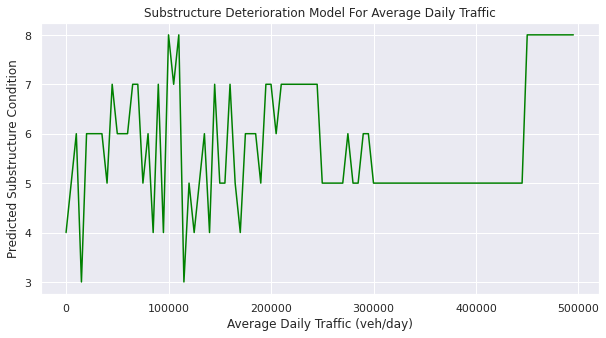

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(yvector, KA9, color ='green')
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Average Daily Traffic")
plt.show()

For Precipitation

In [ ]:
KA10 = []
xvector=[]
for x in range(0,50,5): # Average Precipitation
      pred_x = model2.predict(np.array([50,2,30000,50,25,15,10,50,x,30,85]).reshape(1,-1))[0]
      KA10.append(pred_x)
      xvector.append(x)
      print(x,pred_x)

0 6.0
5 6.0
10 6.0
15 6.0
20 6.0
25 7.0
30 7.0
35 6.0
40 6.0
45 6.0


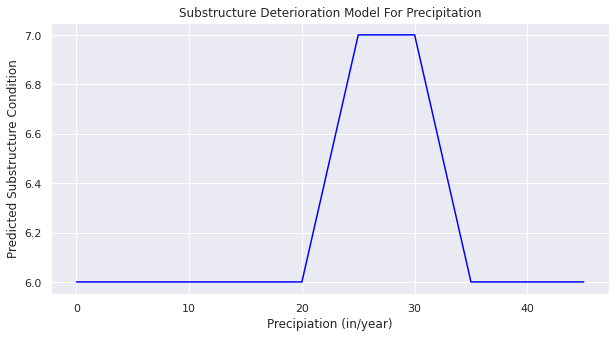

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(xvector, KA10, color ='blue')
plt.xlabel("Precipiation (in/year)")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Precipitation")
plt.show()

# For Average Temperature #

In [ ]:
KA11 = []
zvector=[]
for z in range(0,95,5): # Average Temperature
      pred_z = model2.predict(np.array([50,2,30000,50,25,15,10,z,40,30,85]).reshape(1,-1))[0]
      KA11.append(pred_z)
      zvector.append(z)
      print(z,pred_z)

0 6.0
5 6.0
10 6.0
15 6.0
20 6.0
25 6.0
30 6.0
35 6.0
40 6.0
45 6.0
50 6.0
55 6.0
60 6.0
65 6.0
70 6.0
75 6.0
80 6.0
85 6.0
90 6.0


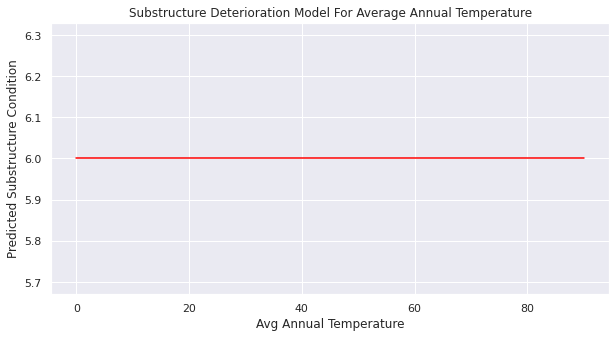

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(zvector, KA11, color ='red')
plt.xlabel("Avg Annual Temperature")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Average Annual Temperature")
plt.show()

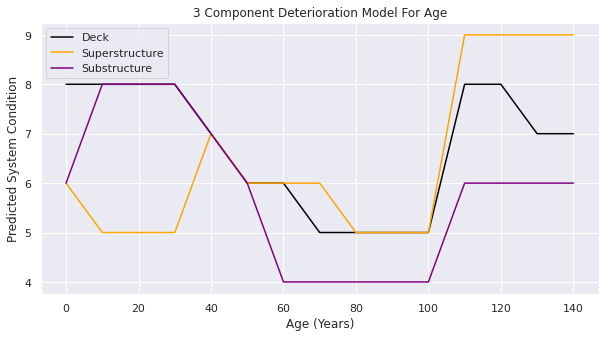

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(ivector, KA, color ='black',label = "Deck")
plt.plot(hvector, KA4, color ='orange',label = "Superstructure")
plt.plot(uvector, KA8, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Age (Years)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Age")
plt.show()

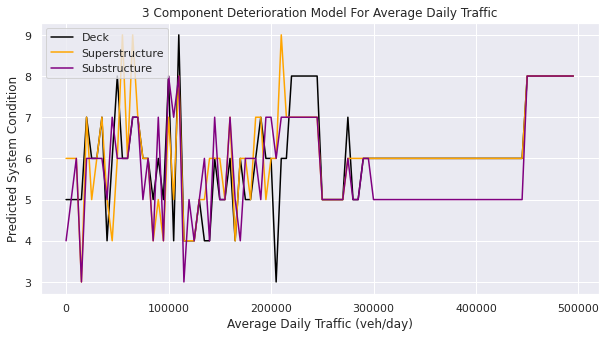

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(jvector, KA1, color ='black',label = "Deck")
plt.plot(mvector, KA5, color ='orange',label = "Superstructure")
plt.plot(yvector, KA9, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Average Daily Traffic")
plt.show()

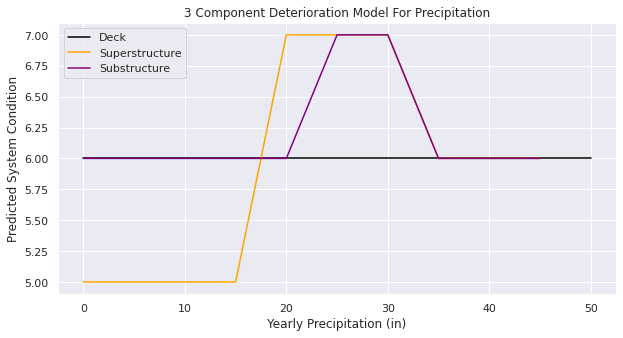

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(kvector, KA2, color ='black',label = "Deck")
plt.plot(nvector, KA6, color ='orange',label = "Superstructure")
plt.plot(xvector, KA10, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Yearly Precipitation (in)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Precipitation")
plt.show()

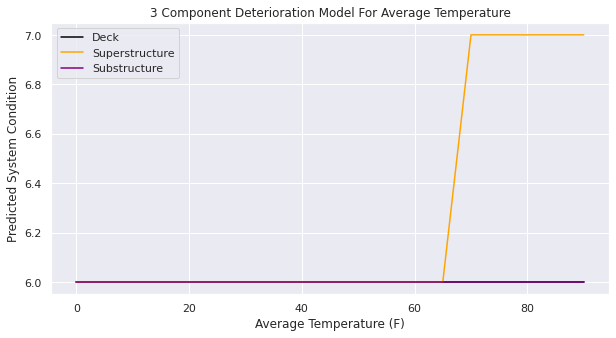

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(lvector, KA3, color ='black',label = "Deck")
plt.plot(tvector, KA7, color ='orange',label = "Superstructure")
plt.plot(zvector, KA11, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Average Temperature")
plt.show()

Correlation

In [ ]:
df3_NY.corr()

,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,avg_temp,avg_prcp,min_temp,max_temp,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
Age_of_Bridge,1.000000,-0.018841,-0.014706,-0.077701,0.014146,-0.086098,-0.082770,0.036837,0.013194,0.039212,0.069333,-0.365467,-0.474133,-0.440716
TRAFFIC_LANES_ON_028A,-0.018841,1.000000,0.552794,0.136930,0.115923,0.793105,0.654571,0.008393,0.002809,0.008540,0.005878,-0.027974,0.023298,0.027511
ADT_029,-0.014706,0.552794,1.000000,0.227457,0.242518,0.488865,0.423381,0.003613,-0.002242,0.003090,-0.002373,-0.034857,-0.010166,0.003752
MAX_SPAN_LEN_MT_048,-0.077701,0.136930,0.227457,1.000000,0.086567,0.129953,0.139503,0.002541,-0.000771,0.003047,0.010374,0.038670,0.041390,0.058839
MAIN_UNIT_SPANS_045,0.014146,0.115923,0.242518,0.086567,1.000000,0.065229,0.082410,-0.007240,-0.005305,-0.007745,-0.007881,-0.059798,-0.070632,-0.062454
ROADWAY_WIDTH_MT_051,-0.086098,0.793105,0.488865,0.129953,0.065229,1.000000,0.714557,0.019281,0.008128,0.020231,0.023484,0.026215,0.098573,0.097122
APPR_WIDTH_MT_032,-0.082770,0.654571,0.423381,0.139503,0.082410,0.714557,1.000000,0.003141,-0.002307,0.003261,0.009503,0.013091,0.075923,0.076320
avg_temp,0.036837,0.008393,0.003613,0.002541,-0.007240,0.019281,0.003141,1.000000,-0.125821,0.975766,0.284235,0.164659,0.178280,0.226845
avg_prcp,0.013194,0.002809,-0.002242,-0.000771,-0.005305,0.008128,-0.002307,-0.125821,1.000000,0.002499,-0.112487,0.083619,0.092616,0.113816
min_temp,0.039212,0.008540,0.003090,0.003047,-0.007745,0.020231,0.003261,0.975766,0.002499,1.000000,0.232560,0.165537,0.178679,0.227273


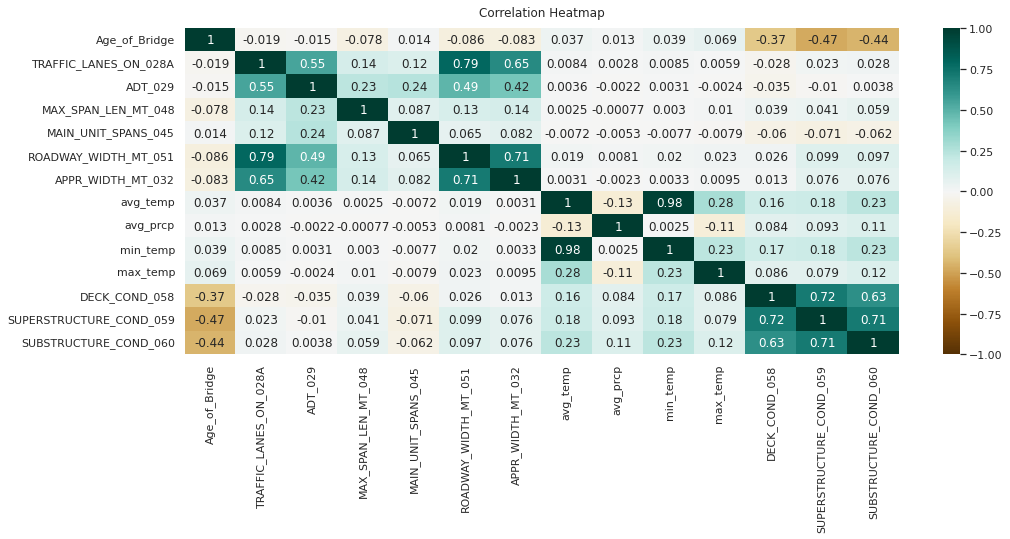

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df3_NY.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
np.triu(np.ones_like(df3_NY.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

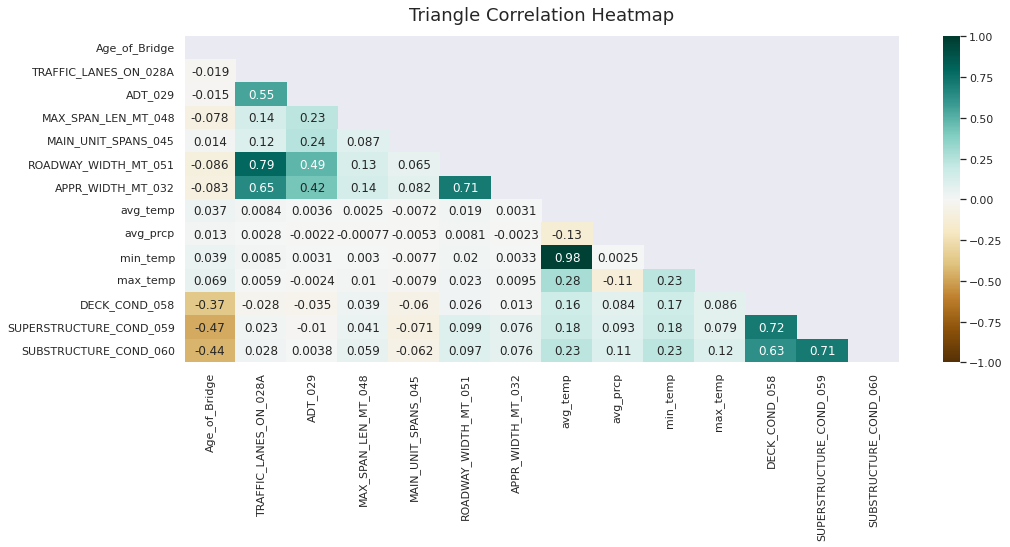

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df3_NY.corr(), dtype=np.bool))
heatmap = sns.heatmap(df3_NY.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Don't run Gradient Boosting as K-Neighbors is enough

Gradient Boosting Trees for Deck

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

Gradient Boosting Trees for SuperStructure

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X1_train, y1_train)
clf.score(X1_test, y1_test)

0.32567110611960887

Gradient Boosting Trees for SubStrucute

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.3004870783842182

**Visualization of Current Deck and Superstructure Materials**

In [ ]:
#Visualizing current deck structure parameters
#Deck structure type is 106,wearing surface is 107,membrane type is 108,deck protection is 109
Vis=pd.read_csv("Datafor555/NY/NY20.csv")
Vis.iloc[:,106]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (36,71,73,75,96,107,108) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0        N
1        1
2        1
3        N
4        N
        ..
17547    N
17548    N
17549    8
17550    1
17551    N
Name: DECK_STRUCTURE_TYPE_107, Length: 17552, dtype: object

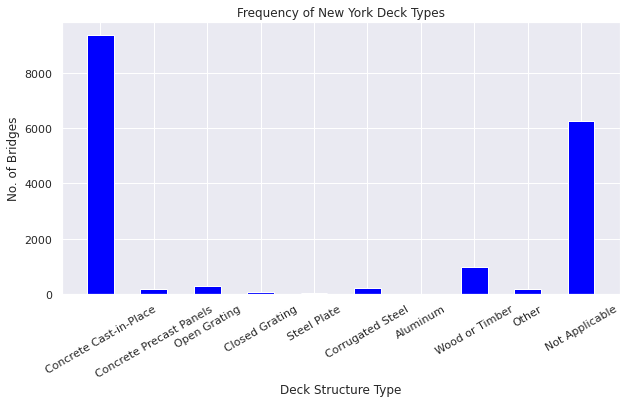

In [ ]:
Vis['DECK_STRUCTURE_TYPE_107'].value_counts()
# 1 Concrete Cast-in-Place 2 Concrete Precast Panels 3 Open Grating 4 Closed Grating 5 Steel plate 6 Corrugated Steel 7 Aluminum 8 Wood or Timber 9 Other N Not applicable
data_dict = {'Concrete Cast-in-Place':9360, 'Concrete Precast Panels':173, 'Open Grating':284, 'Closed Grating':58,'Steel Plate':38,'Corrugated Steel':216,'Aluminum':0,'Wood or Timber':982,'Other':173,'Not Applicable':6268}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='blue',
        width = 0.5)
plt.xlabel("Deck Structure Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of New York Deck Types")
plt.show()

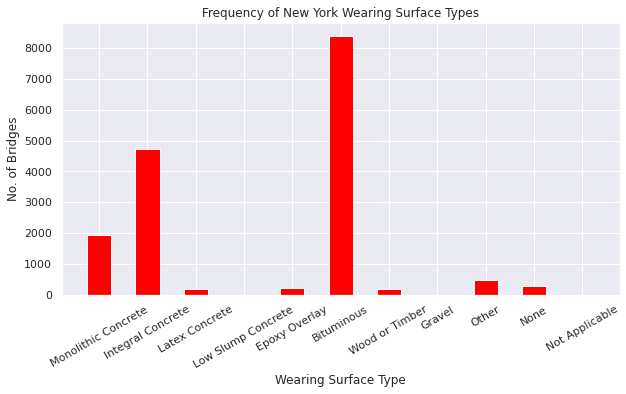

In [ ]:
Vis['SURFACE_TYPE_108A'].value_counts()
#1 Monolithic Concrete 2 Integral Concrete 3 Latex Concrete 4 Low Slump Concrete 5 Epoxy Overlay 6 Bituminous 7 Wood or Timber 8 Gravel 9 Other 0 None (no additional concrete thickness or N Not Applicable (applies only to structures
data_dict = {'Monolithic Concrete':1943, 'Integral Concrete':4719, 'Latex Concrete':186, 'Low Slump Concrete':0,'Epoxy Overlay':213,'Bituminous':8387,'Wood or Timber':179,'Gravel':1,'Other':481, 'None':276,'Not Applicable':13}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='red',
        width = 0.5)
plt.xlabel("Wearing Surface Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of New York Wearing Surface Types")
plt.show()

In [ ]:
Vis['MEMBRANE_TYPE_108B'].value_counts()
# 1 Built-up 2 Preformed Fabric 3 Epoxy 8 Unknown 9 Other 0 None N Not Applicable 
data_dict = {'Built-up':0, 'Preformed Fabric':399, 'Epoxy':42, 'Unknown':192,'Other':210,'None':13808,'Not Applicable':12}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='green',
        width = 0.5)
plt.xlabel("Membrane Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of New York Wearing Membrane Types")
plt.show()


NameError: ignored

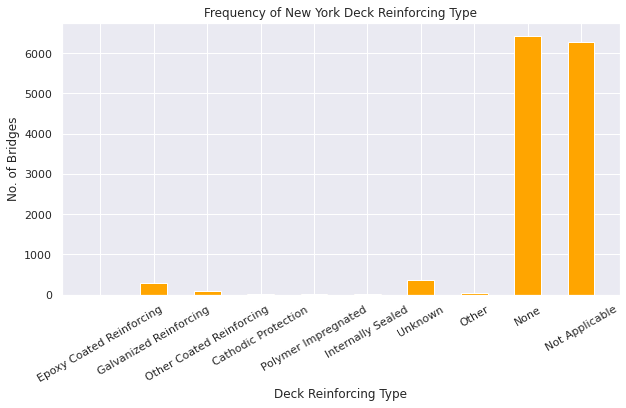

In [ ]:
Vis['DECK_PROTECTION_108C'].value_counts()
#1 Epoxy Coated Reinforcing 2 Galvanized Reinforcing 3 Other Coated Reinforcing 4 Cathodic Protection 6 Polymer Impregnated 7 Internally Sealed8 Unknown 9 Other 0 None N Not Applicable
data_dict = {'Epoxy Coated Reinforcing':0, 'Galvanized Reinforcing':279, 'Other Coated Reinforcing':96, 'Cathodic Protection':2,'Polymer Impregnated':1,'Internally Sealed':2,'Unknown':349,'Other':35,'None':6437,'Not Applicable':6268}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='orange',
        width = 0.5)
plt.xlabel("Deck Reinforcing Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of New York Deck Reinforcing Type")
plt.show()

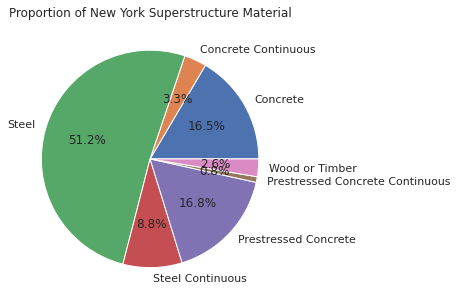

In [ ]:
#Superstructure material Material is 47, structure type is 48
import matplotlib.pyplot as plt
Vis['STRUCTURE_KIND_043A'].value_counts()
#1 Concrete 2 Concrete continuous 3 Steel 4 Steel continuous 5 Prestressed concrete * 6 Prestressed concrete continuous * 7 Wood or Timber 8 Masonry 9 Aluminum, Wrought Iron, or Cast Iron 0 Other
data_dict={'Concrete':2854,'Concrete Continuous':575,'Steel':8848,'Steel Continuous':1519,'Prestressed Concrete':2901,'Prestressed Concrete Continuous':145,'Wood or Timber':455}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.pie(values, labels=types,autopct='%1.1f%%')
plt.title("Proportion of New York Superstructure Material")
plt.show()